![logo](https://github.com/HelmholtzAI-Consultants-Munich/XAI-Tutorials/blob/main/docs/source/_figures/Helmholtz-AI.png?raw=true)

# Model-Agnostic Interpretation with SHAP for Image Analysis

In this Notebook, we will demonstrate how to use the SHapley Additive exPlanations (SHAP) method and interpret its results for image classification models.

--------

## Getting Started

### Setup Colab environment

If you installed the packages and requirements on your machine, you can skip this section and start from the import section.
Otherwise, you can follow and execute the tutorial on your browser. To start working on the notebook, click on the following button. This will open this page in the Colab environment, and you will be able to execute the code on your own.

<a href="https://colab.research.google.com/github/HelmholtzAI-Consultants-Munich/XAI-Tutorials/blob/HelmholtzSummerSchool-2024/xai-for-cnn/4-Tutorial_SHAP_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Now that you opened the notebook in Google Colab, follow the next step:

1. Run this cell to connect your Google Drive to Colab and install packages
2. Allow this notebook to access your Google Drive files. Click on 'Yes', and select your account.
3. "Google Drive for desktop wants to access your Google Account". Click on 'Allow'.
   
At this point, a folder has been created in your Drive, and you can navigate it through the lefthand panel in Colab. You might also have received an email that informs you about the access on your Google Drive.

In [1]:
# Mount drive folder to dbe abale to download repo
from google.colab import drive
drive.mount('/content/drive')

# Switch to correct folder'
%cd /content/drive/MyDrive

# Don't run this cell if you already cloned the repo 
%rm -r XAI-Tutorials
!git clone --branch HelmholtzSummerSchool-2024 https://github.com/HelmholtzAI-Consultants-Munich/XAI-Tutorials.git
%cd XAI-Tutorials/xai-for-cnn

# Install additional packages
%pip install shap

### Imports

Let's start with importing all required Python packages.

In [2]:
import numpy as np
import shap

import sys  

sys.path.append('./')
import utils

We fix the random seeds to ensure reproducible results, as we work with (pseudo) random numbers.

In [3]:
# assert reproducible random number generation
seed = 1
np.random.seed(seed)

--------

## Data and Model Loading: The MNIST Dataset

Let's use the MNIST dataset to see how SHAP can be used to explain image classification models. The MNIST dataset contains images of handwritten digits with numbers from 0 to 9. 

<center><img src="https://github.com/HelmholtzAI-Consultants-Munich/XAI-Tutorials/blob/main/docs/source/_figures/dataset_digits.png?raw=true" width="700" /></center>

<font size=1> Source:
[Link](https://towardsdatascience.com/part-5-training-the-network-to-read-handwritten-digits-c2288f1a2de3)

Let's train a simple 2D Convolutional Neural Network (CNN) for a small number of epochs on our training images.

*Note: this is a very basic model to showcase how SHAP works for image classification. To know more about it, check out the model in the data_and_model folder and other functions we used in the utils.*

In [4]:
# train model 
model, test_loader = utils.get_trained_model(nb_of_epochs=5)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309319
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.257461
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.828616
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.904411
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.796390

Test set: Average loss: 0.0051, Accuracy: 8779/10000 (88%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.668769
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.768451
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.537449
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.613846
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.404566

Test set: Average loss: 0.0028, Accuracy: 9289/10000 (93%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.464840
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.571595
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.344911
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.380186
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.478444

Test set: Average loss: 0.0020, Accuracy: 9471/10000 (95%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.342385
Train Epoch: 4 [12800/60000 (21%)]	Lo

Great, now you have a simple trained CNN model with a high accuracy of ~96%!  

## Now, what does my model think is important in the data?

### SHapley Additive exPlanations (SHAP)

**We prepared a small [Introduction to SHAP](https://xai-tutorials.readthedocs.io/en/latest/_model_agnostic_xai/shap.html) for you, to help you understand how this method works.**

*Note: we provide all references [here](https://xai-tutorials.readthedocs.io/en/latest/_model_agnostic_xai/shap.html#references).*

<font color='green'>

#### Question 1: What does the Shapley value tell you about the effect of the feature on a prediction?

<font color='grey'>

#### Your Answer: 


<font color='green'>

#### Question 2: What is the main limitation of Shapley values and why?

<font color='grey'>

#### Your Answer: 


Now, let's use SHAP to get insights into the image classification model. The `shap.Explainer()` class estimates the Shapley values to explain any machine learning model. Within this class, multiple explainers can be used to explain which features are important in an image for classification. Some of them are:
* [DeepExplainer](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html)
* [PartitionExplainer](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.PartitionExplainer.html)
* [GradientExplainer](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.GradientExplainer.html#shap.GradientExplainer)

All of the above use specific methods to approximate Shapley values for deep learning models. In this course, we will focus on the implementation of `shap.GradientExplainer()`,  which calculates Shapley values for CNN models in a fast and model-specific way. You can read more about each explainer in the [SHAP API](https://shap.readthedocs.io/en/latest/api.html#explainers).

**GradientExplainer**

Many models, including several neural networks, are gradient-based. Gradient-based explanation methods leverage the ability to compute gradients of the loss function with respect to the model input features to explain model predictions. By analyzing how the model's output changes in response to variations in the input features, these methods provide insights into the factors driving model decisions: if a pixel is relevant, a small change in it has big impact on the output, therefore the gradient is high.

The gradients can be used to approximate the Shapley values and GradientExplainer allows to do this estimetion in a fast and efficient way. There’s a connection between the gradient estimator used in GradientExplainer and an explainability method called **Integrated Gradients** ([Sundararajan et al. 2017](https://doi.org/10.48550/arXiv.1703.01365)).
Integrated Gradients is a feature attribution gradient-based method that computes the integral of the gradients on a path which is a straight line from a baseline (e.g. black image) to the input.
The difference between Integrated Gradients and SHAP values is that Integrated Gradients use a single reference point, while Shapley values utilize a background data set. 
We will not go into the details here, but rather focus on interpreting the results. To know more about how the SHAP class shap.GradientExplainer() approximates the Shapley values, we recommend reading the SHAP documentation and the "Interpreting Machine Learning Models With SHAP" book ([Molnar 2022](https://leanpub.com/shap)). 


### Step 1 - Create a baseline

We need to select a part of our data set to create a baseline, i.e., the background dataset to use for integrating our features.

In [5]:
batch = next(iter(test_loader))
images, labels = batch

baseline = images[:100]
img_to_explain = images[100:103]

### Step 2 - Instantiate the class
We decided to focus on GradientExplainer, which is implemented in the `shap.GradientExplainer()`.  
The first argument is the model (or a tuple containing the model and the layer that should be explained, which will return Shapley values for the input of the layer argument - see [example](https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/gradient_explainer/Explain%20an%20Intermediate%20Layer%20of%20VGG16%20on%20ImageNet%20%28PyTorch%29.html)). The second argument is the baseline built with the background dataset.

In [6]:
# explain model prediction
explainer = shap.GradientExplainer(model, baseline)

### Step 3 - Compute SHAP values on a custom image

In the `shap_values()` method we pass as a tensor the image(s) we want to explain.

In [7]:
shap_values = explainer.shap_values(img_to_explain)
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values] # unroll the axes

### Step 4 - Plot results

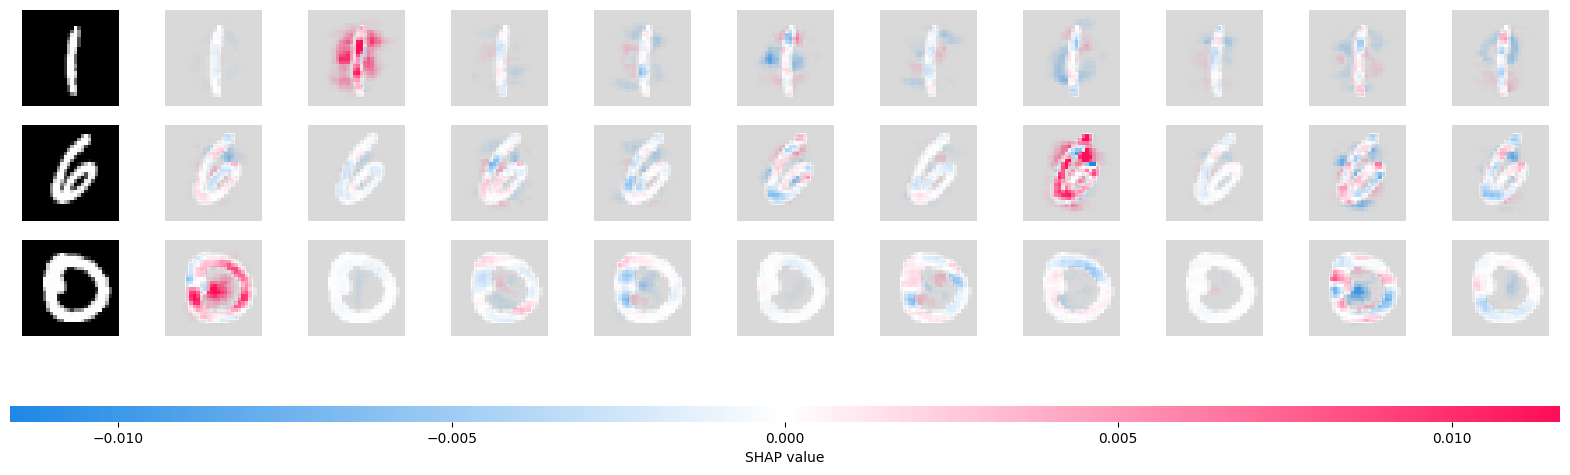

In [8]:
img_to_plot = np.array(img_to_explain).swapaxes(-1,1).swapaxes(1, 2)
shap.image_plot(shap_values, img_to_plot)

SHAP uses colors to explain the pixel attribution:
- Red pixels increase the probability of a class being predicted
- Blue pixels decrease the probability of a class being predicted

In the images above, the input images are shown on the left column and the other columns show the SHAP value for the classes from 1 to 9, with the original image nearly transparent grayscale backings behind each of the explanations. The sum of the SHAP values equals the difference between the expected model output (averaged over the background dataset) and the current model output.

<font color='green'>

#### Question 3: Can you explain from the plot what the Shapley values tell us?

<font color='grey'>

#### Your Answer:

    
<font color='green'>

#### Question 4: Why is SHAP  considered a contrastive method?

Hint: think about the role of the baseline, can you think about other ways to create a baseline for images (image with no features)?

<font color='grey'>

#### Your Answer:

    
<font color='green'>

#### Question 5: What do you think are the strengths and weaknesses of SHAP on image classification?

<font color='grey'>

#### Your Answer: 
